Your client, SleepInc, has shared anonymized sleep data from their hot new sleep tracking app SleepScope. As their data science consultant, your mission is to analyze the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality. See if you can identify patterns leading to insights on sleep quality.

## 💾 The data: sleep_health_data.csv

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months. The data is saved as `sleep_health_data.csv`.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

In [2]:
# Start coding here
# Use as many cells as you need
import pandas as pd
import matplotlib.pyplot as plt

# Import 'sleep_health_data.csv'
sleep_health_data = pd.read_csv('sleep_health_data.csv')

# Check if there are missing values
print(sleep_health_data.isna().sum())

# Check the column names
column_names = sleep_health_data.columns.tolist()
# print(column_names)

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


### Which occupation has the lowest average sleep duration?

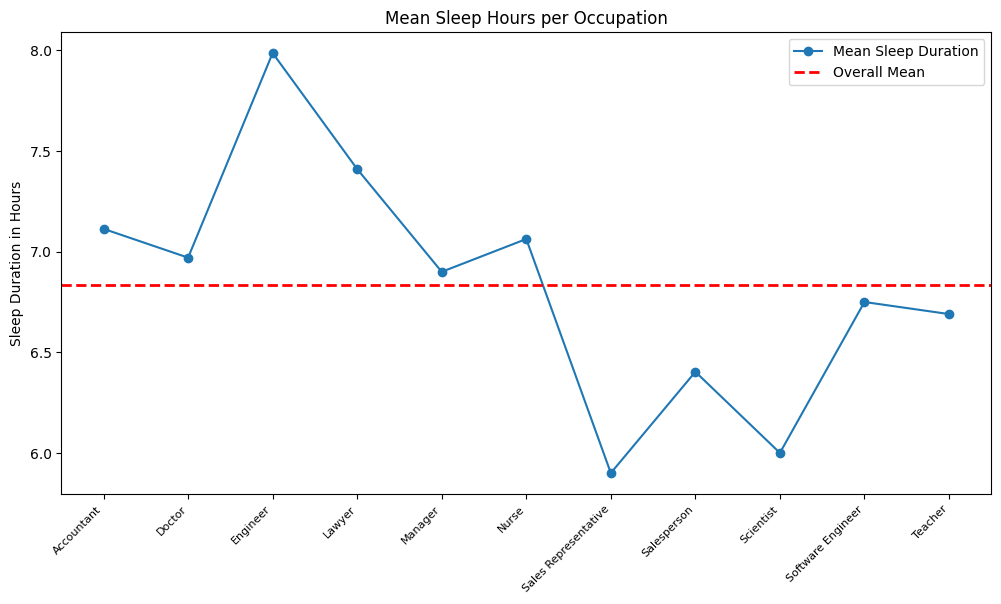

The occupation that has the lowest average sleep quality is the Sales Representative with an average of 5.9 sleep duration.


In [4]:
# Get the mean sleep duration per occupation    
mean_sleep_duration = sleep_health_data.groupby('Occupation')['Sleep Duration'].mean()
# print(mean_sleep_duration)

# Create a new column titled 'Mean Sleep Duration'
sleep_health_data['Mean Sleep Duration'] = sleep_health_data['Occupation'].map(mean_sleep_duration)
sleep_health_data_final = sleep_health_data.drop_duplicates(subset=['Occupation', 'Mean Sleep Duration'])

# Display bar graph of Mean Sleep Duration
fig, ax = plt.subplots(figsize=(12, 6))

# Plot mean sleep duration values
ax.plot(mean_sleep_duration.index, mean_sleep_duration.values, marker='o', label='Mean Sleep Duration')

# Add a horizontal line for the overall mean
ax.axhline(y=mean_sleep_duration.mean(), color='r', linestyle='dashed', linewidth=2, label='Overall Mean')

# Set axis labels and title
ax.set_ylabel('Sleep Duration in Hours')
ax.set_title('Mean Sleep Hours per Occupation')

# Customize x-axis tick labels
ax.set_xticks(mean_sleep_duration.index)
ax.set_xticklabels(mean_sleep_duration.index, rotation=45, ha='right', fontsize=8)

# Display legend
ax.legend()

# Show the plot
plt.show()

# Sort by Mean Sleep Duration
lowest_sleep_occ = sleep_health_data_final[sleep_health_data_final['Mean Sleep Duration'] == sleep_health_data_final['Mean Sleep Duration'].min()]['Occupation'].to_string(index=False, header=False)

# lowest_sleep_occ_str = lowest_sleep_occ['Occupation'].to_string(index=False, header=False)
# print(lowest_sleep_occ_str)

print(f"The occupation that has the lowest average sleep quality is the {lowest_sleep_occ} with an average of {mean_sleep_duration.loc[lowest_sleep_occ]} sleep duration.")

### Which occupation has the lowest average sleep quality?

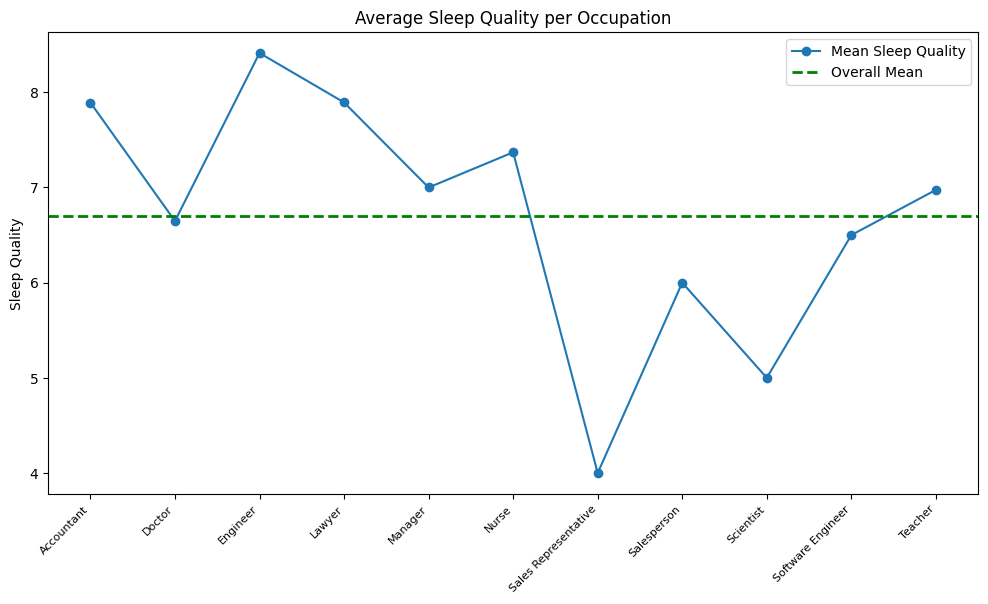

The occupation that has the lowest average sleep quality is the Sales Representative with an average of 4.0 sleep duration.


In [7]:
# Get the mean sleep quality per occupation    
mean_sleep_quality = sleep_health_data.groupby('Occupation')['Quality of Sleep'].mean()
# print(mean_sleep_quality)

# Create a new column titled 'Mean Sleep Quality'
sleep_health_data['Mean Sleep Quality'] = sleep_health_data['Occupation'].map(mean_sleep_quality)
sleep_health_data_final = sleep_health_data.drop_duplicates(subset=['Occupation', 'Mean Sleep Quality'])

# Display bar graph of Mean Sleep Duration
fig, ax = plt.subplots(figsize=(12, 6))

# Plot mean sleep duration values
ax.plot(mean_sleep_quality.index, mean_sleep_quality.values, marker='o', label='Mean Sleep Quality')

# Add a horizontal line for the overall mean
ax.axhline(y=mean_sleep_quality.mean(), color='g', linestyle='dashed', linewidth=2, label='Overall Mean')

# Set axis labels and title
ax.set_ylabel('Sleep Quality')
ax.set_title('Average Sleep Quality per Occupation')

# Customize x-axis tick labels
ax.set_xticks(mean_sleep_quality.index)
ax.set_xticklabels(mean_sleep_quality.index, rotation=45, ha='right', fontsize=8)

# Display legend
ax.legend()

# Show the plot
plt.show()

# Sort by Mean Sleep Duration
lowest_sleep_quality_occ = sleep_health_data_final[sleep_health_data_final['Mean Sleep Quality'] == sleep_health_data_final['Mean Sleep Quality'].min()]['Occupation'].to_string(index=False, header=False)

# lowest_sleep_occ_str = lowest_sleep_occ['Occupation'].to_string(index=False, header=False)

print(f"The occupation that has the lowest average sleep quality is the {lowest_sleep_quality_occ} with an average of {mean_sleep_quality.loc[lowest_sleep_quality_occ]} sleep duration.")

### Did the occupation with the lowest sleep duration also have the lowest sleep quality?

In [6]:
same_occ = True

### How BMI Category can affect sleep disorder rates?

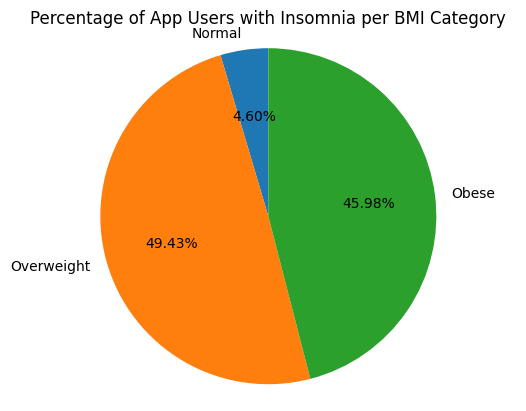

In [9]:
with_insomnia = sleep_health_data[sleep_health_data['Sleep Disorder'] == 'Insomnia']

bmi_with_insomnia = with_insomnia.groupby('BMI Category').size().reset_index(name='Insomnia Count')

# print(bmi_with_insomnia)

bmi_insomnia_ratios = {
    "Normal": round(bmi_with_insomnia.iloc[0, -1] / len(sleep_health_data[sleep_health_data['BMI Category'] == 'Normal']), 2),
    "Overweight": round(bmi_with_insomnia.iloc[2, -1] / len(sleep_health_data[sleep_health_data['BMI Category'] == 'Overweight']), 2),
    "Obese": round(bmi_with_insomnia.iloc[1, -1] / len(sleep_health_data[sleep_health_data['BMI Category'] == 'Obese']), 2)
}

# print(bmi_insomnia_ratios)

# Add labels for pie chart
labels = bmi_insomnia_ratios.keys()
sizes = bmi_insomnia_ratios.values()

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Percentage of App Users with Insomnia per BMI Category')
plt.show()